In [399]:
import json
import pandas as pd

fpaths=[#'/local0/Kariz/expriments/simulator/multidag/md_sw_zipf_pig_0p_cmr.json',
        #'/local0/Kariz/expriments/simulator/multidag/md_sw_zipf_pig_0p_sjf.json',
        '/local0/Kariz/expriments/simulator/multidag/md_sw_zipf_pig_80p_sjf.json',
       # '/local0/Kariz/expriments/simulator/multidag/md_sw_zipf_pig_100p_sjf.json'
]

df_data = []
        
for fpath in fpaths:
    shared, alg = fpath.split('/')[-1].split('.')[0].split('_')[-2:]
    shared = int(shared.replace('p', ''))
    with open(fpath, 'r') as fd:
        raw_data1 = json.loads(fd.read())
        starts = raw_data1['start_time']
        raw_data = raw_data1['statistics']
        
        for gid in starts:
            print(starts[gid], raw_data[gid]['runtime'], starts[gid] + raw_data[gid]['runtime'])
        
        
        round_cached = 0
        round_total = 0
        total_runtime = 0
        for gid in raw_data:
            total_runtime = raw_data[gid]['runtime'] if total_runtime < raw_data[gid]['runtime'] else total_runtime            
            dag_stats = raw_data[gid]['stats']            
            
            for stat in dag_stats:
                round_cached += stat['cached_size']
                round_total += stat['total_size']
                
        df_data.append({'shared': int(shared), 'alg': alg,
                        'total': round_total, 'cache': round_cached,
                       'runtime': total_runtime, 'remote': round_total -  round_cached})
df = pd.DataFrame(df_data)
df.head(5)

#agg_df = df.groupby(['shared', 'alg']).agg('sum').reset_index()
#agg_df

0 117.0 117.0
0 303.0 303.0
0 304.0 304.0
0 360.0 360.0
0 93.0 93.0
0 326.0 326.0
0 288.0 288.0
0 346.0 346.0
0 279.0 279.0
0 233.0 233.0
93.0 447.0 540.0
117.0 129.0 246.0
233.0 224.0 457.0
304.0 240.0 544.0
279.0 333.0 612.0
326.0 184.0 510.0
303.0 327.0 630.0
288.0 32.0 320.0
246.0 392.0 638.0
360.0 141.0 501.0
346.0 256.0 602.0
457.0 353.0 810.0
320.0 419.0 739.0
540.0 283.0 823.0
510.0 379.0 889.0
544.0 58.0 602.0
630.0 192.0 822.0
501.0 217.0 718.0
612.0 111.0 723.0
602.0 414.0 1016.0
602.0 298.0 900.0
810.0 337.0 1147.0
739.0 299.0 1038.0
638.0 345.0 983.0
822.0 460.0 1282.0
718.0 238.0 956.0
723.0 93.0 816.0
823.0 339.0 1162.0
889.0 20.0 909.0
816.0 385.0 1201.0
1147.0 236.0 1383.0
1016.0 272.0 1288.0
900.0 364.0 1264.0
909.0 361.0 1270.0
956.0 309.0 1265.0
1038.0 340.0 1378.0
983.0 357.0 1340.0
1162.0 340.0 1502.0
1282.0 126.0 1408.0
1383.0 258.0 1641.0
1264.0 348.0 1612.0
1265.0 277.0 1542.0
1288.0 409.0 1697.0
1201.0 44.0 1245.0
1270.0 380.0 1650.0
1408.0 170.0 1578.0
1245.0

,alg,cache,remote,runtime,shared,total
0,sjf,12867,13995,496.0,80,26862


In [382]:
import numpy as np
import pandas as pd
 import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")

def format_xticks(x, pos=None):
    print(x)
    return str(x) 

def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="remote", hue='alg', palette=['#d7191c', '#4daf4a'],ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
handles, labels = ax.get_legend_handles_labels()

handles, labels = ax.get_legend_handles_labels()
for index, lbl in enumerate(labels):
    labels[index] = 'CMR-M + CMR' if lbl == 'cmr' else 'SJF + CMR'


ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=7, facecolor=None, framealpha=0, labelspacing=0,
         bbox_to_anchor=(1, 0.7))

ax.annotate('Total read',
            xy=(1.3, 41000),
            xytext=(0, 1),  # 3 points vertical offset
            textcoords="offset points",
            ha='right', va='top',
           fontsize=16)


plt.tight_layout()
fig.savefig('fig_cmrvssjf_remoteread.pdf', format='pdf', dpi=200)
fig.savefig('fig_cmrvssjf_remoteread.png', format='png', dpi=200)
plt.show()



fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="runtime", 
            hue='alg', palette=['#d7191c', '#4daf4a'], ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Runtime (sec)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
plt.subplots_adjust(left=0.09, bottom=0.17, right=0.995, top=0.97)


handles, labels = ax.get_legend_handles_labels()
for index, lbl in enumerate(labels):
    labels[index] = 'CMR-M + CMR' if lbl == 'cmr' else 'SJF + CMR'
    
#labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=1, facecolor=None, framealpha=0, labelspacing=0.05).remove()

plt.tight_layout()
fig.savefig('/local0/Kariz/code/ipython/fig_cmrvssjf_runtime.pdf', format='pdf', dpi=200)
fig.savefig('/local0/Kariz/code/ipython/fig_cmrvssjf_runtime.png', format='png', dpi=200)
plt.show()


IndentationError: unexpected indent (<ipython-input-382-111d6700458b>, line 3)

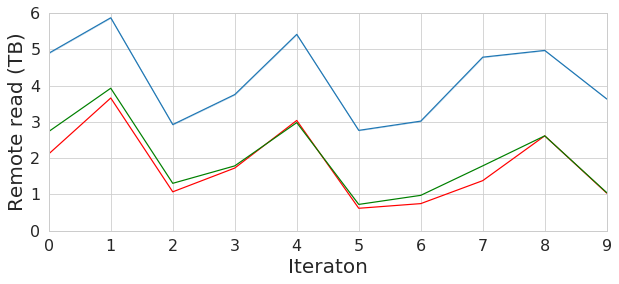

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")


def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df, x="round", y="total", ax=ax)
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=df[(df['alg'] == 'sjf') & (df['shared'] == 6)], x="round",
             y="remote", color='red', ax=ax)
#palette2 = sns.color_palette("mako_r", 2)
sns.lineplot(data=df[(df['alg'] == 'cmr') & (df['shared'] == 6)], x="round",
             y="remote", color='green', ax=ax)
ax.set_xlim(0, 9)
ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(1, color='#4d4d4d')
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('Iteraton', fontsize=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)






In [343]:
# read every 
import json
import pandas as pd

fpaths=['/local0/Kariz/expriments/simulator/multidag/multidag_isolated_0_spark_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_isolated_0_pig_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_0_pig_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_0_spark_1024.json',
        '/local0/Kariz/expriments/simulator/multidag/multidag_unified_2_pig_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_2_spark_1024.json',
        '/local0/Kariz/expriments/simulator/multidag/multidag_unified_4_pig_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_4_spark_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_spark_2048.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_spark_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_pig_2048.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_pig_1024.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_spark_512.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_unified_6_pig_512.json',]

df_data = []
        
for fpath in fpaths:
    cache, shared, alg, cache_size  = fpath.split('/')[-1].split('.')[0].split('_')[-4:]
    with open(fpath, 'r') as fd:
        raw_data = json.loads(fd.read())

        for it in raw_data:
            round_stats = raw_data[it]
            round_cached = 0
            round_total = 0
            total_runtime = 0
            for gid in round_stats:
                dag_stats = round_stats[gid]['stats']            

                total_runtime = round_stats[gid]['runtime'] if total_runtime < round_stats[gid]['runtime'] else total_runtime            
                for stat in dag_stats:
                    round_cached += stat['cached_size']
                    round_total += stat['total_size']
            df_data.append({'shared': int(shared), 'alg': alg, 'cache_type': cache, 
                            'total': round_total, 'cached': round_cached, 'cache_size': cache_size,
                           'round': it, 'runtime': total_runtime, 'remote': round_total -  round_cached})
      #      print(it, round_cached, round_total)
df = pd.DataFrame(df_data)
df.head(5)

agg_df = df.groupby(['cache_type', 'shared', 'alg', 'cache_size']).agg('sum').reset_index()
agg_df.sort_values(['cache_size', 'shared', 'alg'])

,cache_type,shared,alg,cache_size,cached,remote,runtime,total
0,isolated,0,pig,1024,6193,835,4149.0,7028
2,unified,0,pig,1024,5035,1993,4335.0,7028
1,isolated,0,spark,1024,3246,4525,2049.0,7771
3,unified,0,spark,1024,2781,4990,2061.0,7771
4,unified,2,pig,1024,5214,1814,4281.0,7028
5,unified,2,spark,1024,2737,5034,2061.0,7771
6,unified,4,pig,1024,4402,2626,4551.0,7028
7,unified,4,spark,1024,2624,5147,2062.0,7771
8,unified,6,pig,1024,3609,3419,4639.0,7028
11,unified,6,spark,1024,2213,5558,2064.0,7771


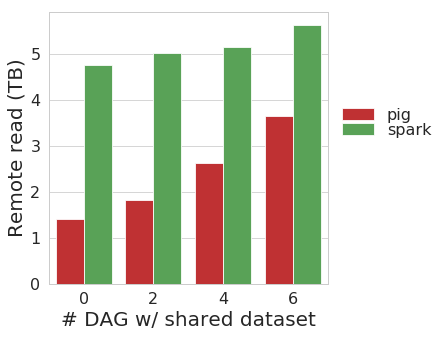

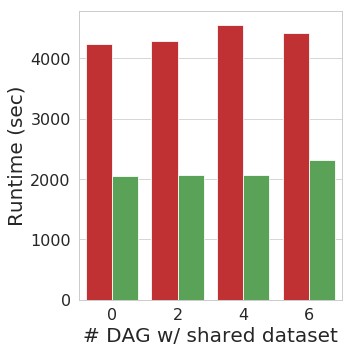

In [349]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")

def format_xticks(x, pos=None):
    print(x)
    return str(x) 

def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="remote", hue='alg', palette=['#d7191c', '#4daf4a'],ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)

handles, labels = ax.get_legend_handles_labels()
#for index, lbl in enumerate(labels):
#    labels[index] = 'CMR-M + CMR' if lbl == 'unified' else 'Isolated + CMR'

ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=0, facecolor=None, framealpha=0, labelspacing=0,
         bbox_to_anchor=(1, 0.7))

#ax.annotate('Total read',
#            xy=(1.3, 41000),
#            xytext=(0, 1),  # 3 points vertical offset
#            textcoords="offset points",
#            ha='right', va='top',
#           fontsize=16)


#plt.tight_layout()
#fig.savefig('fig_cmrvssjf_remoteread.pdf', format='pdf', dpi=200)
#fig.savefig('fig_cmrvssjf_remoteread.png', format='png', dpi=200)
#plt.show()



fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="runtime", 
            hue='alg', palette=['#d7191c', '#4daf4a'], ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Runtime (sec)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
plt.subplots_adjust(left=0.09, bottom=0.17, right=0.995, top=0.97)


handles, labels = ax.get_legend_handles_labels()
#for index, lbl in enumerate(labels):#
#    labels[index] = 'CMR-M + CMR' if lbl == 'unified' else 'Isolated + CMR'
    
#labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=1, facecolor=None, framealpha=0, labelspacing=0.05).remove()

plt.tight_layout()
#fig.savefig('/local0/Kariz/code/ipython/fig_isolatedvsshared_runtime.pdf', format='pdf', dpi=200)
#fig.savefig('/local0/Kariz/code/ipython/fig_isolatedvsshared_runtime.png', format='png', dpi=200)
#plt.show()
